In [2]:
# Nettoyage de la table RealGdp.xls

In [15]:
import os
import numpy as np
import pandas as pd
import statsmodels.tsa.filters.hp_filter as stat
import numbers
import matplotlib.pyplot as plt

In [4]:
#On utilisera data_directory pour aller chercher nos données
wd=os.getcwd()    #votre dossier local (qui est un clone du repo du groupe) a son nom bien à lui. 
data_directory = wd+"\\Donnees" 
data_directory

'C:\\Users\\tayoy\\Documents\\GitHub\\Statapp-Macroeconomie\\Donnees'

In [5]:
file="RealGDPYanis.xls" #fichier manuellement modifié pour supprimer les en-têtes qui empêchaient sa lecture par pd.read_excel
pthfile=data_directory+"\\\\"+"RealGDP_SansHeaders.xls"

In [90]:
df = pd.read_excel(io=pthfile,index_col = 0 ,usecols = "A:IU",header=0)

In [91]:
#Séparation des infos non numériques. On les garde dans ce petit DataFrame au cas où
infos_data = df[['Scale','Base Year']] 
infos_data.head()

,Scale,Base Year
Country,,
Argentina,Millions,2004
Australia,Millions,2019/2020
Austria,Millions,2010
Belgium,Millions,2010
Brazil,Millions,1995


In [92]:
#création du dataFrame qui nous intéresse vraiment :
GDP = df.iloc[:,2:].T #sélection des colones et transposition

In [93]:
types=GDP.applymap(lambda x: isinstance(x,numbers.Number)) #Identifie les entrées qui ne sont pas des nombres (le xls est lu tels que les NaN sont des '...' de type str)
GDP=GDP[types].astype(float) #Remplace les entrées qui ne sont pas des nombres par des NaN
GDP
test_log = False #pour ne pas reprendre le log lors des manipulations sur le notebook

In [80]:
#Remplacement des index (str de format '1959Q1') par des floats pour faciliter les traitements
GDP['Time']=([float(i[:4])+(float(i[-1])-1)/4 for i in (list(GDP.index))])
GDP.set_index(['Time'], inplace=True) 

In [95]:
if test_log==False:
    GDP=np.log(GDP) #Cette étape est à faire pour toutes les variables sauf 'employment rate :
    test_log=True
else :
    print('log déjà appliqué !')

log déjà appliqué !


In [96]:
Fr=GDP['France'].dropna()

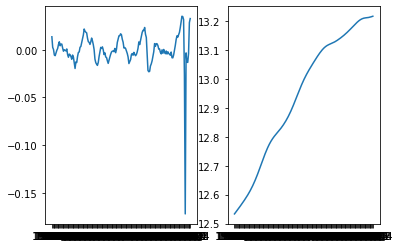

In [105]:
cycles,tendance =stat.hpfilter(Fr, lamb=1600) #attention, il faut nettoyer les NaN dans les séries ! 
figure, axis = plt.subplots(1,2)
axis[0].plot(Fr.index,cycles)
axis[1].plot(Fr.index,tendance)

#all(tendance+cycles==Fr) #test de conformité


C:/Users/tayoy/Documents/ENSAE/Statapp/Données/world_bank/Data_Extract_From_WDI_Database_Archives/403199a9-4743-4c6f-b4b1-8eb698a498c9_Data.csv
